# Tufte Lineplot Recreation with Matplotlib

The goal is to recreate with matplotlib this lineplot that Edward Tufte presented in *The Visual Display of Quantitative Information*:

<img src="lineplot_1_original.jpg"
     alt="Tufte Lineplot"
     style="float: center; width: 50%" />
     
This has been done by Anisha Zaveri here https://anishazaveri.com/2020/05/29/tufte-in-python-part-one/ and I just copy her solution into a notebook environment, so you can play with it.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


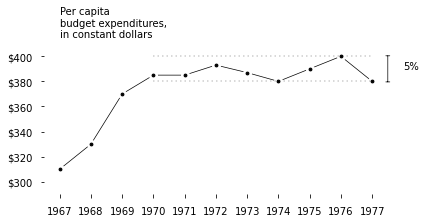

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import ArrowStyle

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Sabon RomanOsF'

# create formatter to convert y_ticks to dollars
def format_ticks(x, pos):
    return f'${x}'

# add some data
x = list(range(1967,1978))
y = [310, 330, 370, 385, 385, 393, 387, 380, 390, 400, 380]

# make the canvas
fig, ax = plt.subplots(figsize=(7, 3))

# remove splines
for spine in ax.spines.keys():
    ax.spines[spine].set_visible(False)

# set axis limits
ax.set_ylim(290, 420)
ax.set_xlim(1966.5, 1979)

# define axis ticks
ax.xaxis.set_ticks(x)
ax.yaxis.set_ticks(list(range(300, 420, 20)))

# increase space between axis labels and ticks
ax.yaxis.set_tick_params(pad=8)
ax.xaxis.set_tick_params(pad=8)

formatter = FuncFormatter(format_ticks)

# modify y ticks to dollars
ax.yaxis.set_major_formatter(formatter)

# plot data
# add two layers of points to create an illusion of a discontinuous line. "zorder" specifies plotting order
ax.scatter(x, y, s=64, color='white', zorder=2)
ax.scatter(x, y, s=8, color='black', zorder=3)

# add connecting line
ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

# add horizontal dotted lines. See linestyles here: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
ax.plot([1970, 1977], [380, 380], linestyle=(
    0, (5, 10)), linewidth=0.3, color='black')
ax.plot([1970, 1977], [400, 400], linestyle=(
    0, (5, 10)), linewidth=0.3, color='black')

# add text
ax.text(1967, 415, "Per capita\nbudget expenditures,\nin constant dollars")
ax.text(1978, 390, "5%")

# add bar
bar = ArrowStyle.BarAB(widthA=0.2, widthB=0.2)
ax.annotate('', xy=(1977.5, 378), xytext=(1977.5, 402),
            arrowprops={'arrowstyle': bar, 'lw': 0.7})

# plot
plt.show()

### 2) Another lineplot

This plot below is another one that Anisha Zaveri reproduced by manipulating matplotlib defaults.

<img src="lineplot_2_original.jpeg"
     alt="Tufte Lineplot"
     style="float: center; width: 50%" />

See the reproduction below.

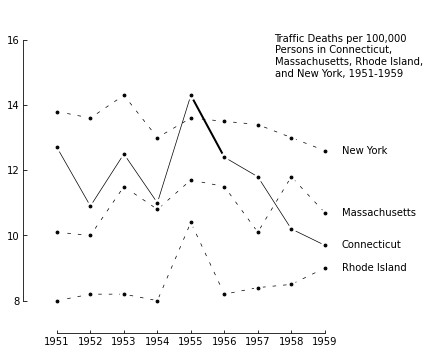

In [4]:
# create data
x = list(range(1951, 1960))
data = []
data.append({'label': 'New York', 'x': x, 'y': [
            13.8, 13.6, 14.3, 13, 13.6, 13.5, 13.4, 13, 12.6]})
data.append({'label': 'Massachusetts', 'x': x, 'y': [
            10.1, 10, 11.5, 10.8, 11.7, 11.50, 10.1, 11.8, 10.7]})
data.append({'label': 'Connecticut', 'x': x, 'y': [
            12.7, 10.9, 12.5, 11, 14.3, 12.4, 11.8, 10.2, 9.7]})
data.append({'label': 'Rhode Island', 'x': x, 'y': [
            8, 8.2, 8.2, 8, 10.4, 8.2, 8.4, 8.5, 9]})

# initialize figure
fig, ax = plt.subplots(figsize=(6, 6))

# remove splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set spline bounds
ax.spines['left'].set_bounds(8, 16)
ax.spines['bottom'].set_bounds(1951, 1959)

# set axis limits
ax.set_ylim(7, 17)
ax.set_xlim(1950, 1960)

# set axis ticks
ax.xaxis.set_ticks(x)
ax.yaxis.set_ticks(list(range(8, 18, 2)))

# make ticks inward facing
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')

# plot data
for data_dict in data:
    x = data_dict['x']
    y = data_dict['y']
    label = data_dict['label']
    ax.scatter(x, y, s=8, color='black', zorder=3)
    ax.scatter(x, y, s=64, color='white', zorder=2)
    if label == 'Connecticut':
        linestyle = 'solid'
        ax.plot([1955, 1956], [y[x.index(1955)], y[x.index(1956)]],
                color='black', linewidth=2, zorder=1, linestyle=linestyle)
    else:
        linestyle = (0, (5, 10))
    ax.plot(x, y, color='black', zorder=1, linewidth=0.7, linestyle=linestyle)
    ax.text(x[-1]+0.5, y[-1], label, va='center')

ax.text(1957.5, 15.5, 'Traffic Deaths per 100,000\nPersons in Connecticut,\nMassachusetts, Rhode Island,\nand New York, 1951-1959', va='center')

plt.show()
